## ESTUDO DE ÁRVORE DE DECISÃO UTILIZANDO SKLEARN PYTHON
### Fernando Gualberto Martins Pereira

In [637]:
from sklearn import tree
from pandas import pandas as pd
import graphviz

### DATASET DE TREINAMENTO

#### Regras para selecionar candidatos para trabalhar em controle de tráfego aéreo

In [638]:
col = ['Reflexo','Concentracao','Pontualidade', 'Percepcao', 'Habilitado']

my_data = [['nao tem', 'pouca', 'fraca', 'baixa', 'nao'],
    ['tem', 'muita', 'fraca', 'alta', 'sim'],
    ['nao tem', 'pouca', 'boa', 'media', 'nao'],
    ['tem', 'muita', 'boa', 'media', 'sim'],
    ['nao tem', 'pouca', 'fraca', 'baixa', 'nao'],
    ['tem', 'muita', 'fraca', 'media', 'sim'],
    ['tem', 'muita', 'boa', 'baixa', 'nao'],
    ['tem', 'muita', 'boa', 'media', 'sim']
]

treinamento = pd.DataFrame(data=my_data, columns=col)
treinamento

,Reflexo,Concentracao,Pontualidade,Percepcao,Habilitado
0,nao tem,pouca,fraca,baixa,nao
1,tem,muita,fraca,alta,sim
2,nao tem,pouca,boa,media,nao
3,tem,muita,boa,media,sim
4,nao tem,pouca,fraca,baixa,nao
5,tem,muita,fraca,media,sim
6,tem,muita,boa,baixa,nao
7,tem,muita,boa,media,sim


In [639]:
dataset = pd.DataFrame(data=my_data, columns=col)

In [640]:
y = dataset['Habilitado']
columns_to_x = ['Reflexo', 'Concentracao', 'Pontualidade', 'Percepcao']
dataset = dataset[columns_to_x]

In [641]:
X = pd.get_dummies(dataset,columns=columns_to_x,drop_first=False)
X

,Reflexo_nao tem,Reflexo_tem,Concentracao_muita,Concentracao_pouca,Pontualidade_boa,Pontualidade_fraca,Percepcao_alta,Percepcao_baixa,Percepcao_media
0,1,0,0,1,0,1,0,1,0
1,0,1,1,0,0,1,1,0,0
2,1,0,0,1,1,0,0,0,1
3,0,1,1,0,1,0,0,0,1
4,1,0,0,1,0,1,0,1,0
5,0,1,1,0,0,1,0,0,1
6,0,1,1,0,1,0,0,1,0
7,0,1,1,0,1,0,0,0,1


In [642]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [643]:
dot_data = tree.export_graphviz(clf, out_file=None) 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph.render("arvore_decisao")

'arvore_decisao.pdf'

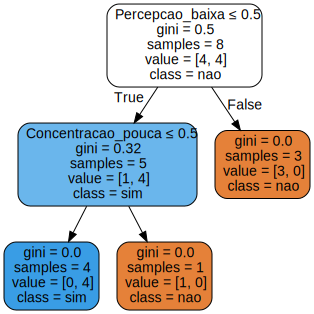

In [644]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         class_names=y,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [652]:
print clf.score(X, y)

1.0


In [653]:
clf.predict(X)

array(['nao', 'sim', 'nao', 'sim', 'nao', 'sim', 'nao', 'sim'], dtype=object)

In [654]:
treinamento

,Reflexo,Concentracao,Pontualidade,Percepcao,Habilitado
0,nao tem,pouca,fraca,baixa,nao
1,tem,muita,fraca,alta,sim
2,nao tem,pouca,boa,media,nao
3,tem,muita,boa,media,sim
4,nao tem,pouca,fraca,baixa,nao
5,tem,muita,fraca,media,sim
6,tem,muita,boa,baixa,nao
7,tem,muita,boa,media,sim
